# Top-Selling Medicines Analysis

In [19]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("./data/pharmacy_sales.csv")

# Convert the 'DateTime' column to actual datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d-%m-%Y %H:%M', errors='coerce')

# New column with only the date (no time)
df['Date'] = df['DateTime'].dt.date

**This section identifies the top 10 medicines that contributed the most to total revenue.**

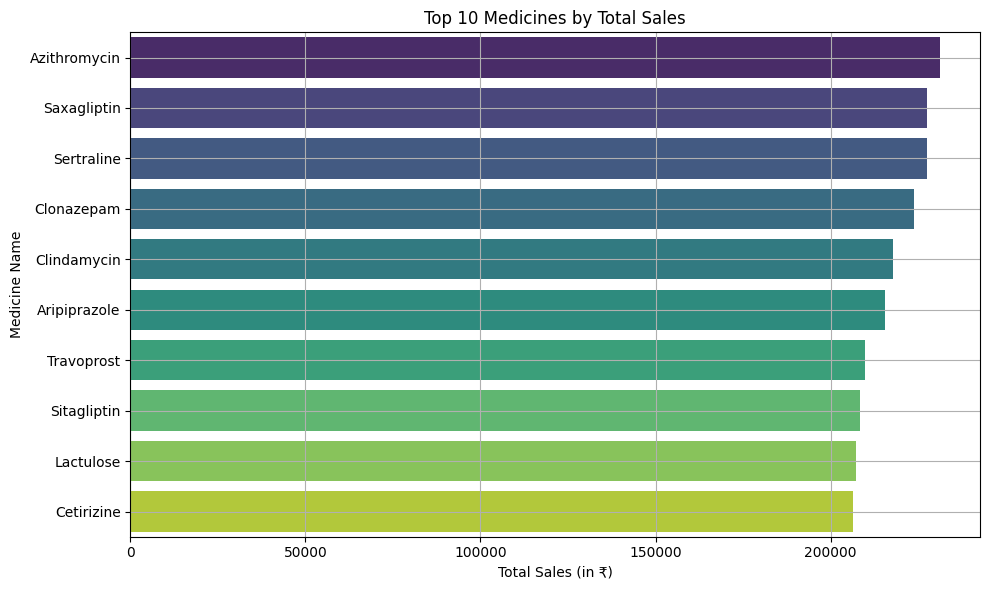

In [20]:
# Group the dataset by medicine name and calculate total sales for each
top_medicines = df.groupby('DrugName')['TotalSales'].sum().reset_index()

# Sort the medicines in descending order based on total sales
top_medicines = top_medicines.sort_values(by='TotalSales', ascending=False)

# Select top 10 highest-selling medicines
top_10_medicines = top_medicines.head(10)

# Set the figure size 
plt.figure(figsize=(10, 6))

# Create a horizontal bar plot 
sns.barplot(
    data=top_10_medicines,
    x='TotalSales',
    y='DrugName',
    hue='DrugName',
    legend=False,  # Hide legend as drug names are already on the y-axis
    palette='viridis'
)

# Chart title and axis labels
plt.title('Top 10 Medicines by Total Sales')
plt.xlabel('Total Sales (in ₹)')
plt.ylabel('Medicine Name')

# grid for easier reading of values
plt.grid(True)

# Automatically adjust spacing 
plt.tight_layout()

# Display the plot
plt.show()

### Observed Trends
- Azithromycin, Saxagliptin, and Sertraline are the top 3 revenue-generating medicines. These medicines likely play a crucial role in overall earnings and may require priority stocking.
- Some medicines like Clonazepam, Clindamycin may contribute significantly either due to high demand or higher price points.

### Suggestions
- Keep a close check on stock levels and expiry dates for these top earners.
- Consider negotiating better supplier rates or bulk deals for high-revenue drugs.

### Limitations
- This ranking is based on revenue, not actual units sold.
- Expensive medicines might appear at the top even if they are not the most frequently sold.

**This section identifies which medicines were most frequently sold based on total quantity. This reflects actual consumer demand, independent of price.**

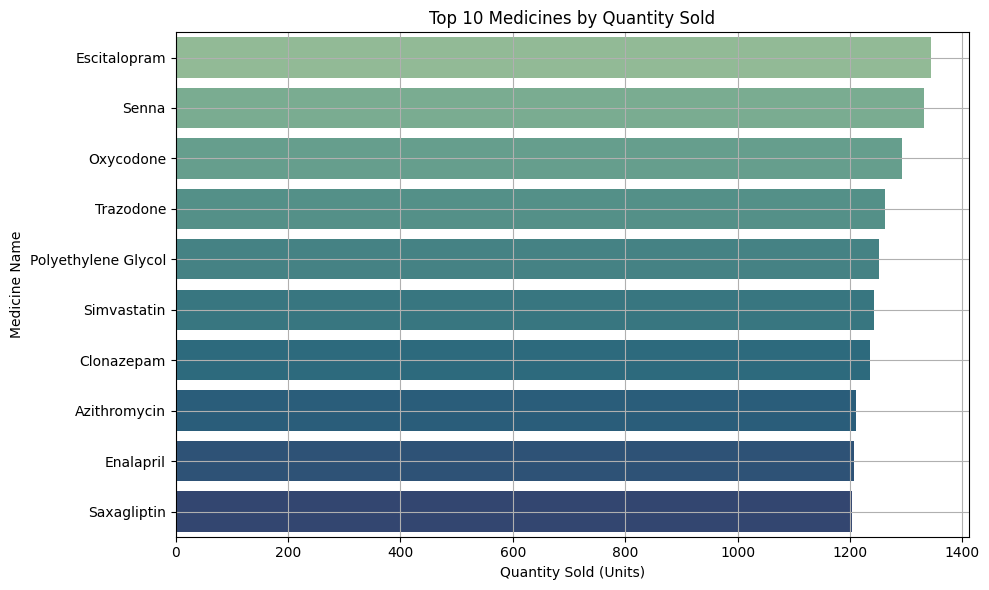

In [21]:
# Group data by drug name and calculate the total quantity sold for each
top_by_quantity = df.groupby('DrugName')['Quantity'].sum().reset_index()

# Sort medicines in descending order by quantity sold
top_by_quantity = top_by_quantity.sort_values(by='Quantity', ascending=False)

# Top 10 medicines sold in the highest quantities
top_10_by_quantity = top_by_quantity.head(10)

# Size of the plot 
plt.figure(figsize=(10, 6))

# Create a horizontal bar plot
sns.barplot(
    data=top_10_by_quantity,
    x='Quantity',
    y='DrugName',
    hue='DrugName',        
    legend=False,          
    palette='crest'        
)

# Title and axis labels
plt.title('Top 10 Medicines by Quantity Sold')
plt.xlabel('Quantity Sold (Units)')
plt.ylabel('Medicine Name')

# Grid lines
plt.grid(True)

# Adjust layout 
plt.tight_layout()

# Display the final plot
plt.show()

### Observed Trends
- Escitalopram, Senna, and Oxycodone lead in quantity sold, indicating high, consistent demand.
- Medicines like Trazodone, Simvastatin, and Polyethylene Glycol also appear as fast-moving items.
- A few high-demand medicines like Azithromycin, Saxagliptin are also top performers in revenue, suggesting dual priority.
- These medicines are likely prescribed for common or chronic conditions, requiring regular restocking.

### Suggestions
- Focus on maintaining adequate stock for these medicines to prevent shortages.
- Prioritize shelf space for fast-moving items to ensure they’re easily accessible and restocked quickly.

### Limitations
- This chart focuses only on unit sales, not on revenue or profit.
- Some low-cost medicines may top this list but contribute less to overall earnings.
- Does not include expiry data, which is important for high-volume drugs.

**This section explores the relationship between the total revenue and quantity sold for the top 10 highest-earning medicines.**

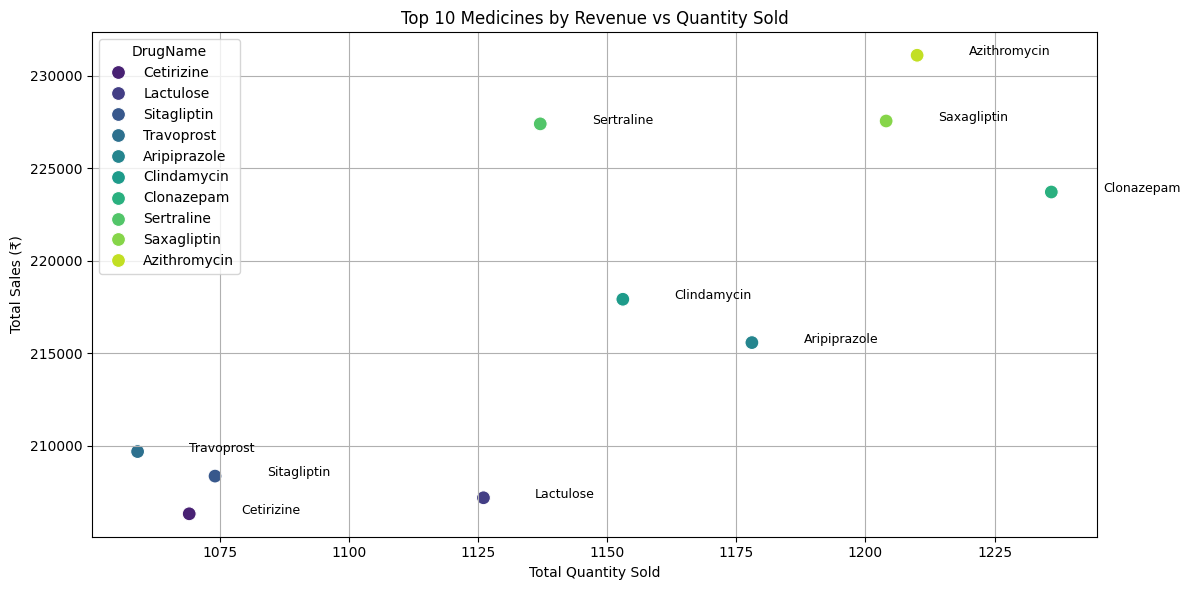

In [22]:
# Group the data by each unique medicine name & calculate total revenue and quantity sold for each
drug_summary = df.groupby('DrugName').agg({
    'TotalSales': 'sum',   
    'Quantity': 'sum'      
}).reset_index()           

# 10 medicines that made the most revenue
top_10_revenue_drugs = drug_summary.sort_values(by='TotalSales', ascending=False).head(10)

# Re-sort these top 10 medicines by TotalSales (lowest to highest)
top_10_revenue_drugs = top_10_revenue_drugs.sort_values(by='TotalSales', ascending=True)

# Specify figure size
plt.figure(figsize=(12, 6))

# Create a scatter plot where:
sns.scatterplot(data=top_10_revenue_drugs, x='Quantity', y='TotalSales', hue='DrugName', s=100, palette='viridis')

# Text labels for each dot (medicine name)
for i in range(len(top_10_revenue_drugs)):
    plt.text(
        top_10_revenue_drugs['Quantity'].iloc[i] + 10,        
        top_10_revenue_drugs['TotalSales'].iloc[i],          
        top_10_revenue_drugs['DrugName'].iloc[i],              
        fontsize=9                                              
    )

# Chart title and axis labels
plt.title("Top 10 Medicines by Revenue vs Quantity Sold")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Total Sales (₹)")

# Add gridlines
plt.grid(True)

# Fit everything neatly
plt.tight_layout()

# Display the final plot
plt.show()

### Observed Trends

### Suggestions

### Limitations
